<h1>Uber Stock Data - Time Series Analysis</h1>
<p>Time Series Analysis of Uber Stock Data</p>
<img src="https://cdn.mos.cms.futurecdn.net/5ij5qdSHFzJ2piPRuoTL5F-1200-80.jpg">

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h1>Loading Data</h1>

In [2]:
data = pd.read_csv("../input/uber-stock-data/UBER.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
...,...,...,...,...,...,...,...
600,2021-09-27,46.770000,47.430000,46.189999,47.250000,47.250000,23034800
601,2021-09-28,46.700001,47.000000,45.759998,45.980000,45.980000,23707900
602,2021-09-29,46.000000,46.529999,44.299999,44.520000,44.520000,24599500
603,2021-09-30,44.709999,45.365002,43.860001,44.799999,44.799999,16650600


<h1>Data Engineering</h1>

In [3]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<h1>Statistics</h1>

In [4]:
pd.set_option("display.float","{:.2f}".format)
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,605.00,605.00,605.00,605.00,605.00,605.00
mean,40.24,41.01,39.35,40.19,40.19,23574391.87
std,9.80,9.88,9.65,9.74,9.74,17270501.26
min,15.96,17.80,13.71,14.82,14.82,3380000.00
25%,32.37,33.02,31.45,32.47,32.47,13528200.00
50%,38.88,39.24,37.39,38.48,38.48,19223500.00
75%,48.49,49.62,47.75,48.41,48.41,28609600.00
max,63.25,64.05,60.80,63.18,63.18,186322500.00


<ul>
    <li><pre>Mean Opening Price :   &dollar;40.24</pre></li>
    <li><pre>Mean Closing Price :   &dollar;40.19</pre></li>
    <li><pre>Mean High value    :   &dollar;41.01</pre></li>
    <li><pre>Mean Low value     :   &dollar;39.35</pre></li>
    <li><pre>Mean Volume Traded :   23574391.87</pre></li>
</ul>

<h1>Analysis for the year 2019</h1>
<ul>
    <li>Open vs Close</li>
    <li>High vs Low</li>
    <li>Date vs Volume</li>
</ul>

In [5]:
data_filtered = data[(data.Date >= "2019-01-01") & (data.Date <= "2019-12-31")]

In [6]:
print("Start Date : ",data_filtered.Date.min())
print("End Date   : ",data_filtered.Date.max())

Start Date :  2019-05-10
End Date   :  2019-12-31


<h2>Statistics</h2>


In [7]:
data_filtered.describe()

,Open,High,Low,Close,Adj Close,Volume
count,163.00,163.00,163.00,163.00,163.00,163.00
mean,35.63,36.21,34.89,35.54,35.54,18798274.23
std,6.22,6.29,6.09,6.15,6.15,21775805.70
min,26.06,26.80,25.58,25.99,25.99,3380000.00
25%,30.17,30.47,29.53,30.13,30.13,7725550.00
50%,33.60,34.23,32.94,33.31,33.31,10434300.00
75%,42.33,43.15,41.26,42.31,42.31,23356900.00
max,46.98,47.08,45.08,46.38,46.38,186322500.00


<b>Inference : </b>
<ul>
    <li><pre>Mean Opening Price :   &dollar;35.63</pre></li>
    <li><pre>Mean Closing Price :   &dollar;35.54</pre></li>
    <li><pre>Mean High value    :   &dollar;36.21</pre></li>
    <li><pre>Mean Low value     :   &dollar;34.89</pre></li>
    <li><pre>Mean Volume Traded :   18798274.23</pre></li>
</ul>

In [8]:
print("Distribution Variance for Close vs Adj Close : {:.2f}".format(np.linalg.norm(data_filtered.Close - data_filtered["Adj Close"])))

Distribution Variance for Close vs Adj Close : 0.00


<p><b>Inference : </b>0 variance for the Close vs Adj Close shows that adjusted closing was equal to closing price all times or almost all times.</p>



Distribution Variance for Open vs Close : 10.66


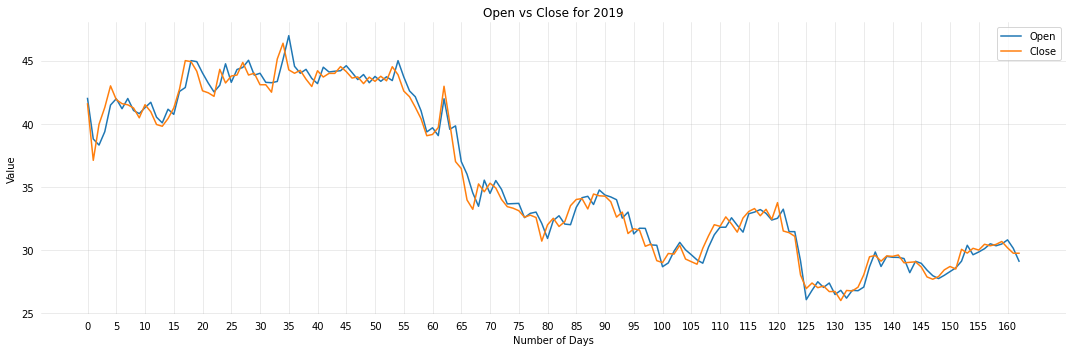

In [9]:
print("\n\nDistribution Variance for Open vs Close : {:.2f}".format(np.linalg.norm(data_filtered.Open - data_filtered.Close)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(15,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Open,label="Open")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Close,label="Close")
plt.tick_params(bottom=False,left=False)
plt.title("Open vs Close for 2019")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.tight_layout()

In [10]:
print("Highest Opening Price Date : ",data_filtered[data_filtered.Open == data_filtered.Open.max()].Date.values[0])
print("Highest Closing Price Date : ",data_filtered[data_filtered.Close == data_filtered.Close.max()].Date.values[0])

print("Lowest Opening Price Date  : ",data_filtered[data_filtered.Open == data_filtered.Open.min()].Date.values[0])
print("Lowest Closing Price Date  : ",data_filtered[data_filtered.Close == data_filtered.Close.min()].Date.values[0])

Highest Opening Price Date :  2019-07-01
Highest Closing Price Date :  2019-06-28
Lowest Opening Price Date  :  2019-11-06
Lowest Closing Price Date  :  2019-11-14


<p><b>Inference : </b>A higher opening and closing price was observed on <b>34th</b> and <b>35th trading day</b> respectively. A relatively low opening price was observed on <b>125th trading day</b> and a lowest closing price was observed on <b>132nd trading day </b>. A smaller value of Distribution Variance (10.66) tells that Open and Close price are numerically close by on average during each trading day.</p>



Distribution Variance for High vs Low   : 18.86


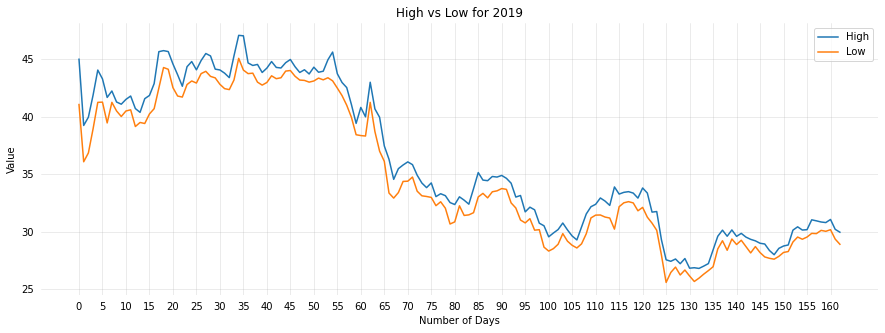

In [11]:
print("\n\nDistribution Variance for High vs Low   : {:.2f}".format(np.linalg.norm(data_filtered.High - data_filtered.Low)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(15,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.High,label="High")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Low,label="Low")
plt.tick_params(bottom=False,left=False)
plt.title("High vs Low for 2019")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [12]:
print("Peak High Price Date    : ",data_filtered[data_filtered.High == data_filtered.High.max()].Date.values[0])
print("Peak Low Price Date     : ",data_filtered[data_filtered.Low == data_filtered.Low.max()].Date.values[0])

print("Lowest High Price Date  : ",data_filtered[data_filtered.High == data_filtered.High.min()].Date.values[0])
print("Lowest Low Price Date   : ",data_filtered[data_filtered.Low == data_filtered.Low.min()].Date.values[0])

Peak High Price Date    :  2019-06-28
Peak Low Price Date     :  2019-06-28
Lowest High Price Date  :  2019-11-15
Lowest Low Price Date   :  2019-11-06


<p><b>Inference : </b>The peak of High and Low value was observed during <b>35th day</b> and the lowest of High and Low value was observed during <b>130th</b> and <b>125th trading days</b> respectively. In addition to that, a large enough distribution variance of 18.86 shows there is a significance variance on average in the numerical values.</p>

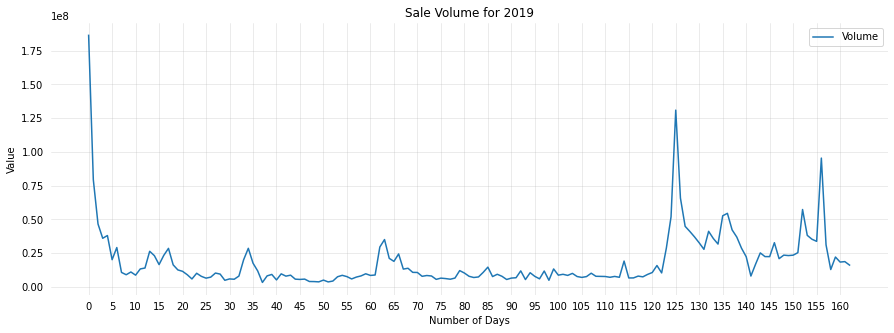

In [13]:
print("\n\n")
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(15,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Volume,label="Volume")
plt.tick_params(bottom=False,left=False)
plt.title("Sale Volume for 2019")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [14]:
print("Peak Volume Date   : ",data_filtered[data_filtered.Volume == data_filtered.Volume.max()].Date.values[0])
print("Lowest Volume Date : ",data_filtered[data_filtered.Volume == data_filtered.Volume.min()].Date.values[0])

Peak Volume Date   :  2019-05-10
Lowest Volume Date :  2019-07-03


<p><b>Inference : </b>The peak of trading volume was observed during the <b>first trading day</b> followed by a flooring of the volume until the next two peaks during <b>125th</b> and <b>156th</b> trading days respectively.</p>

<h1>Analysis for the year 2020</h1>
<ul>
    <li>Open vs Close</li>
    <li>High vs Low</li>
    <li>Date vs Volume</li>
</ul>

In [15]:
data_filtered = data[(data.Date >= "2020-01-01") & (data.Date <= "2020-12-31")]

In [16]:
print("Start Date : ",data_filtered.Date.min())
print("End Date   : ",data_filtered.Date.max())

Start Date :  2020-01-02
End Date   :  2020-12-31


<h2>Statistics</h2>

In [17]:
data_filtered.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.00,253.00,253.00,253.00,253.00,253.00
mean,35.47,36.30,34.63,35.51,35.51,27679798.42
std,7.63,7.67,7.69,7.65,7.65,16383372.23
min,15.96,17.80,13.71,14.82,14.82,6316800.00
25%,31.01,31.70,30.47,31.08,31.08,16915800.00
50%,34.08,34.59,33.15,34.01,34.01,21947800.00
75%,37.30,37.90,36.72,37.14,37.14,33683500.00
max,54.59,56.02,53.65,54.86,54.86,112325800.00


In [18]:
print("Distribution Variance for Close vs Adj Close : {:.2f}".format(np.linalg.norm(data_filtered.Close - data_filtered["Adj Close"])))

Distribution Variance for Close vs Adj Close : 0.00


<p><b>Inference : </b>0 variance for the Close vs Adj Close shows that adjusted closing was equal to closing price all times or almost all times.</p>

<b>Inference : </b>
<ul>
    <li><pre>Mean Opening Price :   &dollar;35.47</pre></li>
    <li><pre>Mean Closing Price :   &dollar;35.51</pre></li>
    <li><pre>Mean High value    :   &dollar;36.30</pre></li>
    <li><pre>Mean Low value     :   &dollar;34.63</pre></li>
    <li><pre>Mean Volume Traded :   27679798.42</pre></li>
</ul>



Distribution Variance for Open vs Close : 16.51


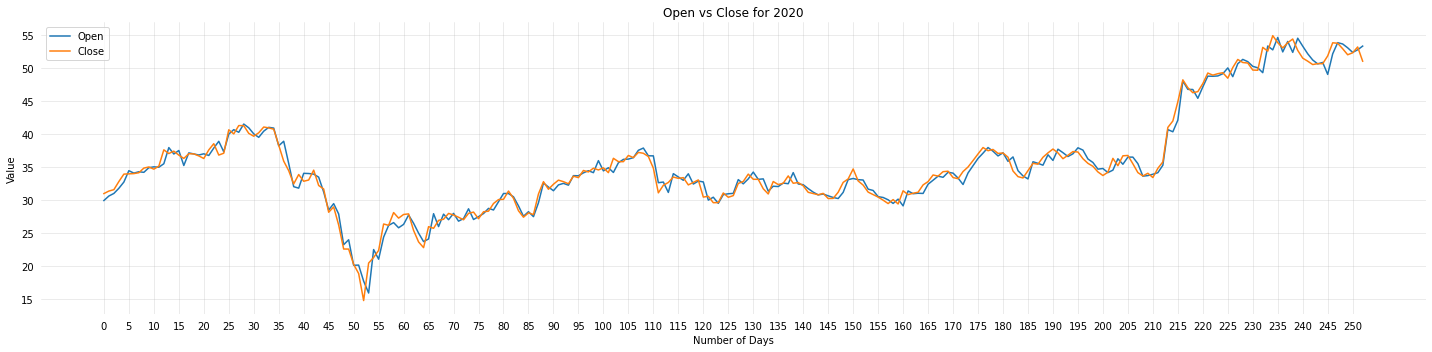

In [19]:
print("\n\nDistribution Variance for Open vs Close : {:.2f}".format(np.linalg.norm(data_filtered.Open - data_filtered.Close)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Open,label="Open")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Close,label="Close")
plt.tick_params(bottom=False,left=False)
plt.title("Open vs Close for 2020")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.tight_layout()

In [20]:
print("Highest Opening Price Date : ",data_filtered[data_filtered.Open == data_filtered.Open.max()].Date.values[0])
print("Highest Closing Price Date : ",data_filtered[data_filtered.Close == data_filtered.Close.max()].Date.values[0])

print("Lowest Opening Price Date  : ",data_filtered[data_filtered.Open == data_filtered.Open.min()].Date.values[0])
print("Lowest Closing Price Date  : ",data_filtered[data_filtered.Close == data_filtered.Close.min()].Date.values[0])

Highest Opening Price Date :  2020-12-07
Highest Closing Price Date :  2020-12-04
Lowest Opening Price Date  :  2020-03-19
Lowest Closing Price Date  :  2020-03-18


<p><b>Inference : </b>A higher opening and closing price was observed on <b>235th</b> and <b>234th</b> day respectively. A relatively low opening price was observed on <b>53th day</b> and a lowest closing price was observed on <b>52nd day</b>. A relatively higher value of Distribution Variance (16.51) with previous year tells that Open and Close price were numerically apart on average during each trading day pointing to the large change in stock prices throught the year.</p>



Distribution Variance for High vs Low   : 29.37


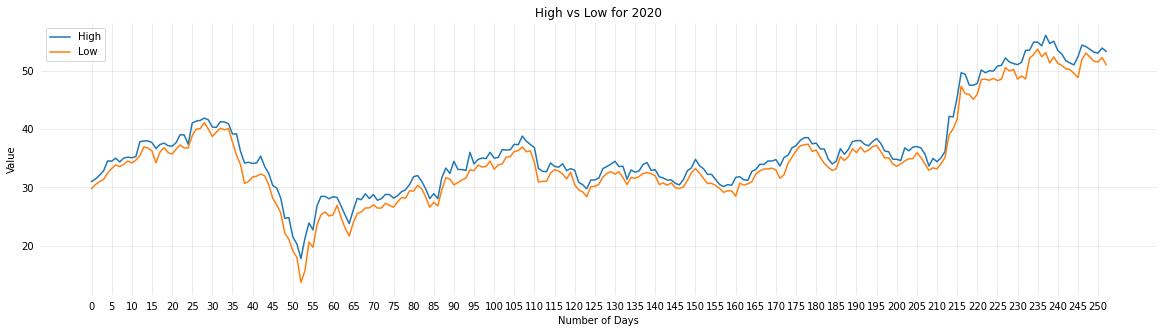

In [21]:
print("\n\nDistribution Variance for High vs Low   : {:.2f}".format(np.linalg.norm(data_filtered.High - data_filtered.Low)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.High,label="High")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Low,label="Low")
plt.tick_params(bottom=False,left=False)
plt.title("High vs Low for 2020")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [22]:
print("Peak High Price Date    : ",data_filtered[data_filtered.High == data_filtered.High.max()].Date.values[0])
print("Peak Low Price Date     : ",data_filtered[data_filtered.Low == data_filtered.Low.max()].Date.values[0])

print("Lowest High Price Date  : ",data_filtered[data_filtered.High == data_filtered.High.min()].Date.values[0])
print("Lowest Low Price Date   : ",data_filtered[data_filtered.Low == data_filtered.Low.min()].Date.values[0])

Peak High Price Date    :  2020-12-09
Peak Low Price Date     :  2020-12-07
Lowest High Price Date  :  2020-03-18
Lowest Low Price Date   :  2020-03-18


<p><b>Inference : </b>The peak of High and Low value was observed during <b>237th</b> and <b>235th</b> trading day respectively. The lowest of High and Low value was observed during <b>52ndtrading day</b>. In addition to that, a relatively large enough distribution variance of 29.37 shows there is a significance variance on average in the numerical values.</p>

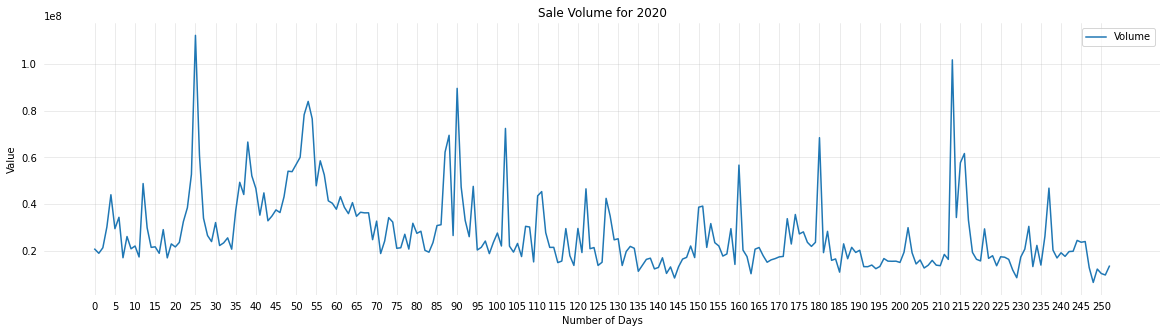

In [23]:
print("\n\n")
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Volume,label="Volume")
plt.tick_params(bottom=False,left=False)
plt.title("Sale Volume for 2020")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [24]:
print("Peak Volume Date   : ",data_filtered[data_filtered.Volume == data_filtered.Volume.max()].Date.values[0])
print("Lowest Volume Date : ",data_filtered[data_filtered.Volume == data_filtered.Volume.min()].Date.values[0])

Peak Volume Date   :  2020-02-07
Lowest Volume Date :  2020-12-24


<p><b>Inference : </b>The peak of trading volume was observed during the <b>25th trading day</b> followed by another of the volume  during <b>212th</b> trading day respectively. The lowest volume traded was recorded on <b>249th trading day</b>.</p>

<h1>Analysis for the year 2021</h1>
<ul>
    <li>Open vs Close</li>
    <li>High vs Low</li>
    <li>Date vs Volume</li>
</ul>

In [25]:
data_filtered = data[(data.Date >= "2021-01-01") & (data.Date <= "2021-12-31")]

In [26]:
print("Start Date : ",data_filtered.Date.min())
print("End Date   : ",data_filtered.Date.max())

Start Date :  2021-01-04
End Date   :  2021-10-01


<h2>Statistics</h2>

In [27]:
data_filtered.describe()

,Open,High,Low,Close,Adj Close,Volume
count,189.00,189.00,189.00,189.00,189.00,189.00
mean,50.60,51.46,49.52,50.46,50.46,22197880.33
std,6.33,6.39,6.07,6.25,6.25,12062792.83
min,38.30,39.00,38.08,38.48,38.48,8361600.00
25%,45.88,46.79,44.85,45.98,45.98,14926500.00
50%,50.67,51.49,49.71,50.76,50.76,18822300.00
75%,55.75,57.18,54.81,55.69,55.69,26232800.00
max,63.25,64.05,60.80,63.18,63.18,106631700.00


In [28]:
print("Distribution Variance for Close vs Adj Close : {:.2f}".format(np.linalg.norm(data_filtered.Close - data_filtered["Adj Close"])))

Distribution Variance for Close vs Adj Close : 0.00


<p><b>Inference : </b>0 variance for the Close vs Adj Close shows that adjusted closing was equal to closing price all times or almost all times.</p>

<b>Inference : </b>
<ul>
    <li><pre>Mean Opening Price :   &dollar;50.60</pre></li>
    <li><pre>Mean Closing Price :   &dollar;50.46</pre></li>
    <li><pre>Mean High value    :   &dollar;51.46</pre></li>
    <li><pre>Mean Low value     :   &dollar;49.52</pre></li>
    <li><pre>Mean Volume Traded :   22197880.33</pre></li>
</ul>



Distribution Variance for Open vs Close : 16.80


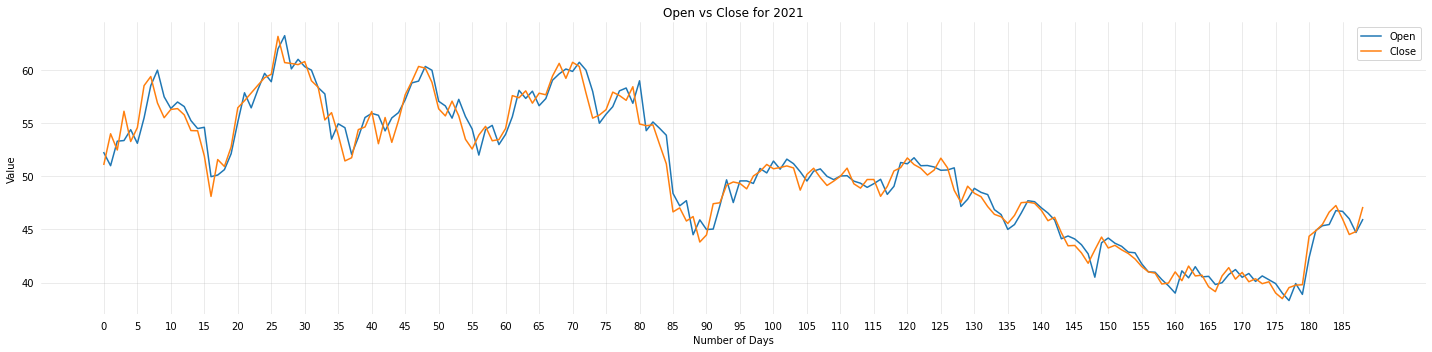

In [29]:
print("\n\nDistribution Variance for Open vs Close : {:.2f}".format(np.linalg.norm(data_filtered.Open - data_filtered.Close)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Open,label="Open")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Close,label="Close")
plt.tick_params(bottom=False,left=False)
plt.title("Open vs Close for 2021")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.tight_layout()

In [30]:
print("Highest Opening Price Date : ",data_filtered[data_filtered.Open == data_filtered.Open.max()].Date.values[0])
print("Highest Closing Price Date : ",data_filtered[data_filtered.Close == data_filtered.Close.max()].Date.values[0])

print("Lowest Opening Price Date  : ",data_filtered[data_filtered.Open == data_filtered.Open.min()].Date.values[0])
print("Lowest Closing Price Date  : ",data_filtered[data_filtered.Close == data_filtered.Close.min()].Date.values[0])

Highest Opening Price Date :  2021-02-11
Highest Closing Price Date :  2021-02-10
Lowest Opening Price Date  :  2021-09-16
Lowest Closing Price Date  :  2021-09-15


<p><b>Inference : </b>A higher opening and closing price was observed on <b>26th</b> and <b>26th</b> trading day respectively. A relatively low opening price was observed on <b>177th trading day</b> and a lowest closing price was observed on <b>176th trading day</b>. A relatively higher value of Distribution Variance (16.80) tells that Open and Close price were numerically apart on average during each trading day pointing to the large change in stock prices throught the year.</p>



Distribution Variance for High vs Low   : 29.56


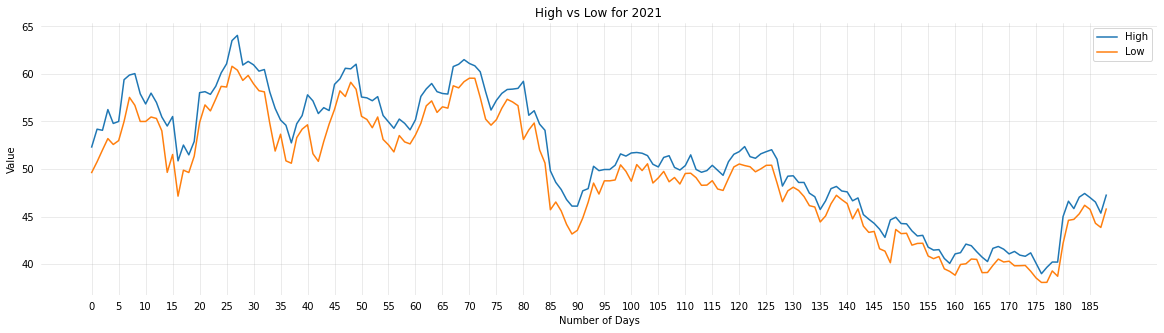

In [31]:
print("\n\nDistribution Variance for High vs Low   : {:.2f}".format(np.linalg.norm(data_filtered.High - data_filtered.Low)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.High,label="High")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Low,label="Low")
plt.tick_params(bottom=False,left=False)
plt.title("High vs Low for 2021")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [32]:
print("Peak High Price Date    : ",data_filtered[data_filtered.High == data_filtered.High.max()].Date.values[0])
print("Peak Low Price Date     : ",data_filtered[data_filtered.Low == data_filtered.Low.max()].Date.values[0])

print("Lowest High Price Date  : ",data_filtered[data_filtered.High == data_filtered.High.min()].Date.values[0])
print("Lowest Low Price Date   : ",data_filtered[data_filtered.Low == data_filtered.Low.min()].Date.values[0])

Peak High Price Date    :  2021-02-11
Peak Low Price Date     :  2021-02-10
Lowest High Price Date  :  2021-09-15
Lowest Low Price Date   :  2021-09-15


<p><b>Inference : </b>The peak of High and Low value was observed during <b>27th</b> and <b>26th</b> trading day respectively. The lowest of High and Low value was observed during <b>175th</b> and <b>176th</b> trading day. In addition to that, a relatively large enough distribution variance of 29.56 shows there is a significance variance on average in the numerical values.</p>

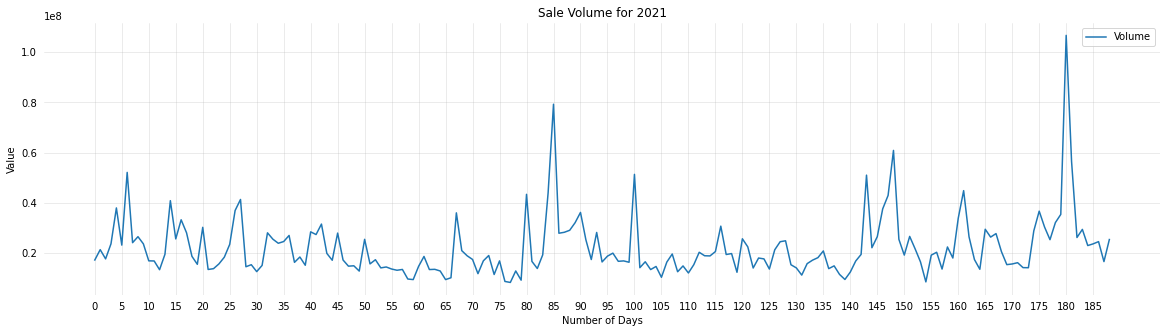

In [33]:
print("\n\n")
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Volume,label="Volume")
plt.tick_params(bottom=False,left=False)
plt.title("Sale Volume for 2021")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [34]:
print("Peak Volume Date   : ",data_filtered[data_filtered.Volume == data_filtered.Volume.max()].Date.values[0])
print("Lowest Volume Date : ",data_filtered[data_filtered.Volume == data_filtered.Volume.min()].Date.values[0])

Peak Volume Date   :  2021-09-21
Lowest Volume Date :  2021-04-26


<p><b>Inference : </b>The peak of trading volume was observed during the <b>180th trading day</b> followed by another of the volume  during <b>85th</b> trading day respectively. The lowest volume traded was recorded on <b>77th trading day</b>.</p>

<h1 style="margin:auto;text-align:center;background-color:rgb(232, 230, 223);border-radius : 5px;padding-top : 25px;padding-bottom : 25px; width : 80%;font-size : 25px;">Thank you for reading! Upvote and share my notebook if you liked it</h1>